In [61]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [62]:
!cp "/content/drive/MyDrive/Colab Notebooks/Jena/jena_climate_2009_2016.csv" "/content/jenaweather.csv"

In [63]:
df = pd.read_csv('/content/jenaweather.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [64]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [65]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:25]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 01:10:00,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
2009-01-01 01:20:00,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
2009-01-01 01:30:00,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5


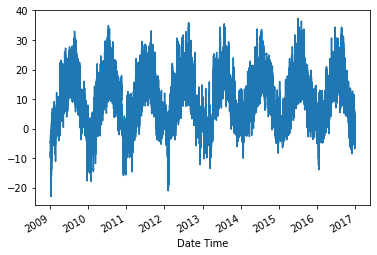

In [66]:
temp = df['T (degC)']
temp.plot()

In [67]:
#df[' _tempm'].fillna(df[' _tempm'].mean(), inplace = True)
#df[' _tempm'] = df[' _tempm'].interpolate()

In [68]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [69]:
WINDOW_SIZE = 30
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((420521, 30, 1), (420521,))

In [70]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 00:10:00,-8.02,1.230769e+09
2009-01-01 00:20:00,-8.41,1.230769e+09
2009-01-01 00:30:00,-8.51,1.230770e+09
2009-01-01 00:40:00,-8.31,1.230770e+09
2009-01-01 00:50:00,-8.27,1.230771e+09
...,...,...
2016-12-31 23:20:00,-4.05,1.483226e+09
2016-12-31 23:30:00,-3.35,1.483227e+09
2016-12-31 23:40:00,-3.16,1.483228e+09


In [71]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,-8.02,1.230769e+09,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,1.230769e+09,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,1.230770e+09,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,1.230770e+09,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,1.230771e+09,0.216440,0.976296,0.009930,0.999951


In [72]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 00:10:00,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,0.216440,0.976296,0.009930,0.999951


In [73]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [74]:
WINDOW_SIZE = 30
X2, y2 = df_to_X_y2(temp_df, WINDOW_SIZE)
X2.shape, y2.shape

((420521, 30, 5), (420521,))

In [75]:
X2_train, y2_train = X2[:336440], y2[:336440]
X2_val, y2_val = X2[336440:378496], y2[336440:378496]
X2_test, y2_test = X2[378496:], y2[378496:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((336440, 30, 5),
 (336440,),
 (42056, 30, 5),
 (42056,),
 (42025, 30, 5),
 (42025,))

In [76]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [77]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[-0.73325209, -0.73727734,  0.67559021,  0.93787729,
          0.34696712],
        [-0.73917625, -0.70710678,  0.70710678,  0.93791874,
          0.34685508],
        [-0.74154591, -0.67559021,  0.73727734,  0.93796017,
          0.34674303],
        ...,
        [-0.8363324 ,  0.34202014,  0.93969262,  0.93899156,
          0.34394018],
        [-0.84344139,  0.38268343,  0.92387953,  0.93903264,
          0.343828  ],
        [-0.84344139,  0.42261826,  0.90630779,  0.93907371,
          0.34371582]],

       [[-0.73917625, -0.70710678,  0.70710678,  0.93791874,
          0.34685508],
        [-0.74154591, -0.67559021,  0.73727734,  0.93796017,
          0.34674303],
        [-0.7486549 , -0.64278761,  0.76604444,  0.93800158,
          0.34663098],
        ...,
        [-0.84344139,  0.38268343,  0.92387953,  0.93903264,
          0.343828  ],
        [-0.84344139,  0.42261826,  0.90630779,  0.93907371,
          0.34371582],
        [-0.84344139,  0.46174861,  0.88701083, 

In [78]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((30, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [79]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [80]:
history1 = model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
10513/10514 [============================>.] - ETA: 0s - loss: 8.5362 - root_mean_squared_error: 2.9217

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10514/10514 [==============================] - 191s 18ms/step - loss: 8.5356 - root_mean_squared_error: 2.9216 - val_loss: 0.1600 - val_root_mean_squared_error: 0.4000
Epoch 2/10
10513/10514 [============================>.] - ETA: 0s - loss: 0.0846 - root_mean_squared_error: 0.2909

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10514/10514 [==============================] - 189s 18ms/step - loss: 0.0846 - root_mean_squared_error: 0.2909 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2641
Epoch 3/10
10514/10514 [==============================] - ETA: 0s - loss: 0.0529 - root_mean_squared_error: 0.2301

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10514/10514 [==============================] - 195s 19ms/step - loss: 0.0529 - root_mean_squared_error: 0.2301 - val_loss: 0.0506 - val_root_mean_squared_error: 0.2250
Epoch 4/10
10513/10514 [============================>.] - ETA: 0s - loss: 0.0432 - root_mean_squared_error: 0.2079

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10514/10514 [==============================] - 248s 24ms/step - loss: 0.0432 - root_mean_squared_error: 0.2079 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2093
Epoch 5/10
10513/10514 [============================>.] - ETA: 0s - loss: 0.0417 - root_mean_squared_error: 0.2043

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10514/10514 [==============================] - 240s 23ms/step - loss: 0.0417 - root_mean_squared_error: 0.2043 - val_loss: 0.0420 - val_root_mean_squared_error: 0.2050
Epoch 6/10
10514/10514 [==============================] - ETA: 0s - loss: 0.0413 - root_mean_squared_error: 0.2033

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10514/10514 [==============================] - 216s 21ms/step - loss: 0.0413 - root_mean_squared_error: 0.2033 - val_loss: 0.0416 - val_root_mean_squared_error: 0.2038
Epoch 7/10
10514/10514 [==============================] - 190s 18ms/step - loss: 0.0411 - root_mean_squared_error: 0.2026 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2092
Epoch 8/10
10514/10514 [==============================] - 199s 19ms/step - loss: 0.0409 - root_mean_squared_error: 0.2022 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2086
Epoch 9/10
10514/10514 [==============================] - 190s 18ms/step - loss: 0.0406 - root_mean_squared_error: 0.2016 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2058
Epoch 10/10
10514/10514 [==============================] - 191s 18ms/step - loss: 0.0406 - root_mean_squared_error: 0.2015 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2062


In [81]:
from tensorflow.keras.models import load_model
model4 = load_model('model4/')

In [82]:
train_predictions1 = model4.predict(X2_train).flatten()
train_results1 = pd.DataFrame(data={'Train Predictions':train_predictions1, 'Actuals':y2_train})
train_results1

,Train Predictions,Actuals
0,-9.668501,-9.67
1,-9.678443,-9.68
2,-9.687255,-9.90
3,-9.952663,-9.91
4,-9.900655,-9.51
...,...,...
336435,13.420260,13.53
336436,13.431778,13.40
336437,13.248212,13.26
336438,13.125502,13.16


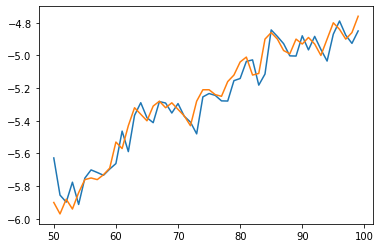

In [83]:
import matplotlib.pyplot as plt
plt.plot(train_results1['Train Predictions'][50:100])
plt.plot(train_results1['Actuals'][50:100])

In [84]:
val_predictions1 = model4.predict(X2_val).flatten()
val_results1 = pd.DataFrame(data={'Val Predictions':val_predictions1, 'Actuals':y2_val})
val_results1

,Val Predictions,Actuals
0,13.051967,13.13
1,13.061429,13.06
2,12.958223,12.88
3,12.740448,12.77
4,12.687633,12.73
...,...,...
42051,1.908525,1.93
42052,1.900834,1.93
42053,1.906723,1.93
42054,1.907543,1.87


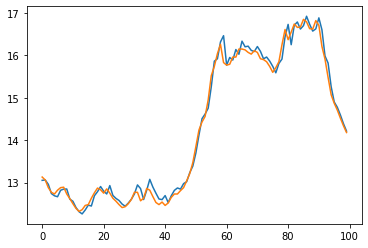

In [85]:
plt.plot(val_results1['Val Predictions'][:100])
plt.plot(val_results1['Actuals'][:100])

In [86]:
test_predictions1 = model4.predict(X2_test).flatten()
test_results1 = pd.DataFrame(data={'Test Predictions':test_predictions1, 'Actuals':y2_test})
test_results1

,Test Predictions,Actuals
0,1.861153,1.87
1,1.847525,1.86
2,1.837455,1.80
3,1.755143,1.80
4,1.795397,1.78
...,...,...
42020,-4.095587,-4.05
42021,-4.123203,-3.35
42022,-3.102801,-3.16
42023,-3.217141,-4.23


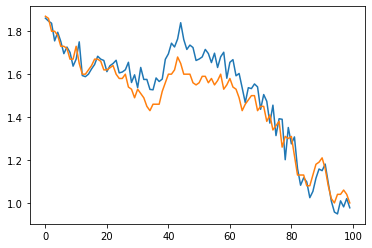

In [87]:
plt.plot(test_results1['Test Predictions'][:100])
plt.plot(test_results1['Actuals'][:100])

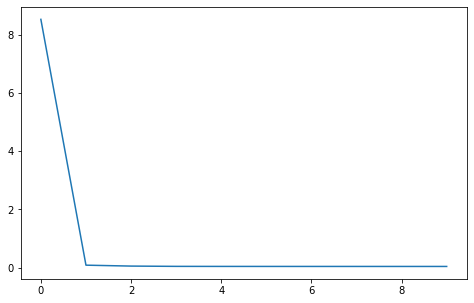

In [88]:
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'])

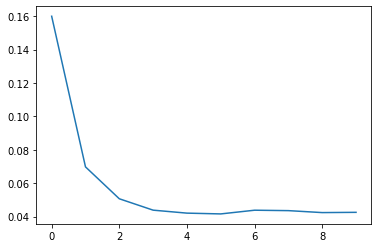

In [89]:
plt.plot(history1.history['val_loss'])

In [90]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(       Predictions  Actuals
 0         1.861153     1.87
 1         1.847525     1.86
 2         1.837455     1.80
 3         1.755143     1.80
 4         1.795397     1.78
 ...            ...      ...
 42020    -4.095587    -4.05
 42021    -4.123203    -3.35
 42022    -3.102801    -3.16
 42023    -3.217141    -4.23
 42024    -4.671762    -4.82
 
 [42025 rows x 2 columns], 0.042394041164052335)

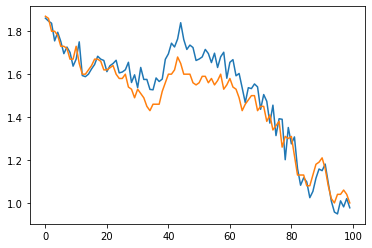

In [91]:
plot_predictions1(model4, X2_test, y2_test)